In [1]:
import warnings
warnings.filterwarnings("ignore")
from ALLCools.mcds.MCDS import MCDS
import pandas as pd
from pathlib import Path
import anndata
from cemba_data.tools.hdf5.anndata import rank_features_groups
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
species='Human'

In [3]:
orthologs = pd.read_csv('PATH-TO-ANALYSIS/misc//gene_ortholog_table.csv', index_col=0) 
ens2sym = dict(zip(orthologs[f'{species}_Ensembl_ID'], orthologs[f'{species}_Symbol']))


In [4]:
cluster_rename = pd.read_csv('PATH-TO-ANALYSIS/Human/integration-with-rna/integration_results/cytosplore.human.tsv',sep='\t')
cluster_rename = dict(zip(cluster_rename['DNAm_cluster_name'], cluster_rename['DNAm_cluster_label']))

In [5]:
adata = anndata.read_h5ad('PATH-TO-ANALYSIS/Human/integration-with-rna/Human.snmc.all.CHN.h5ad')
adata = adata[(adata.obs['Class']!='Outlier')&(adata.obs['SubCluster']!='Outlier')]
adata.var.index = adata.var.index.map(ens2sym.get)
adata.obs.rename(columns={'SubCluster':'DNAm cluster'},inplace=True)
adata.obs['DNAm cluster'] = adata.obs['DNAm cluster'].apply(cluster_rename.get)
rank_features_groups(adata, 'DNAm cluster')

Trying to set attribute `.obs` of view, making a copy.


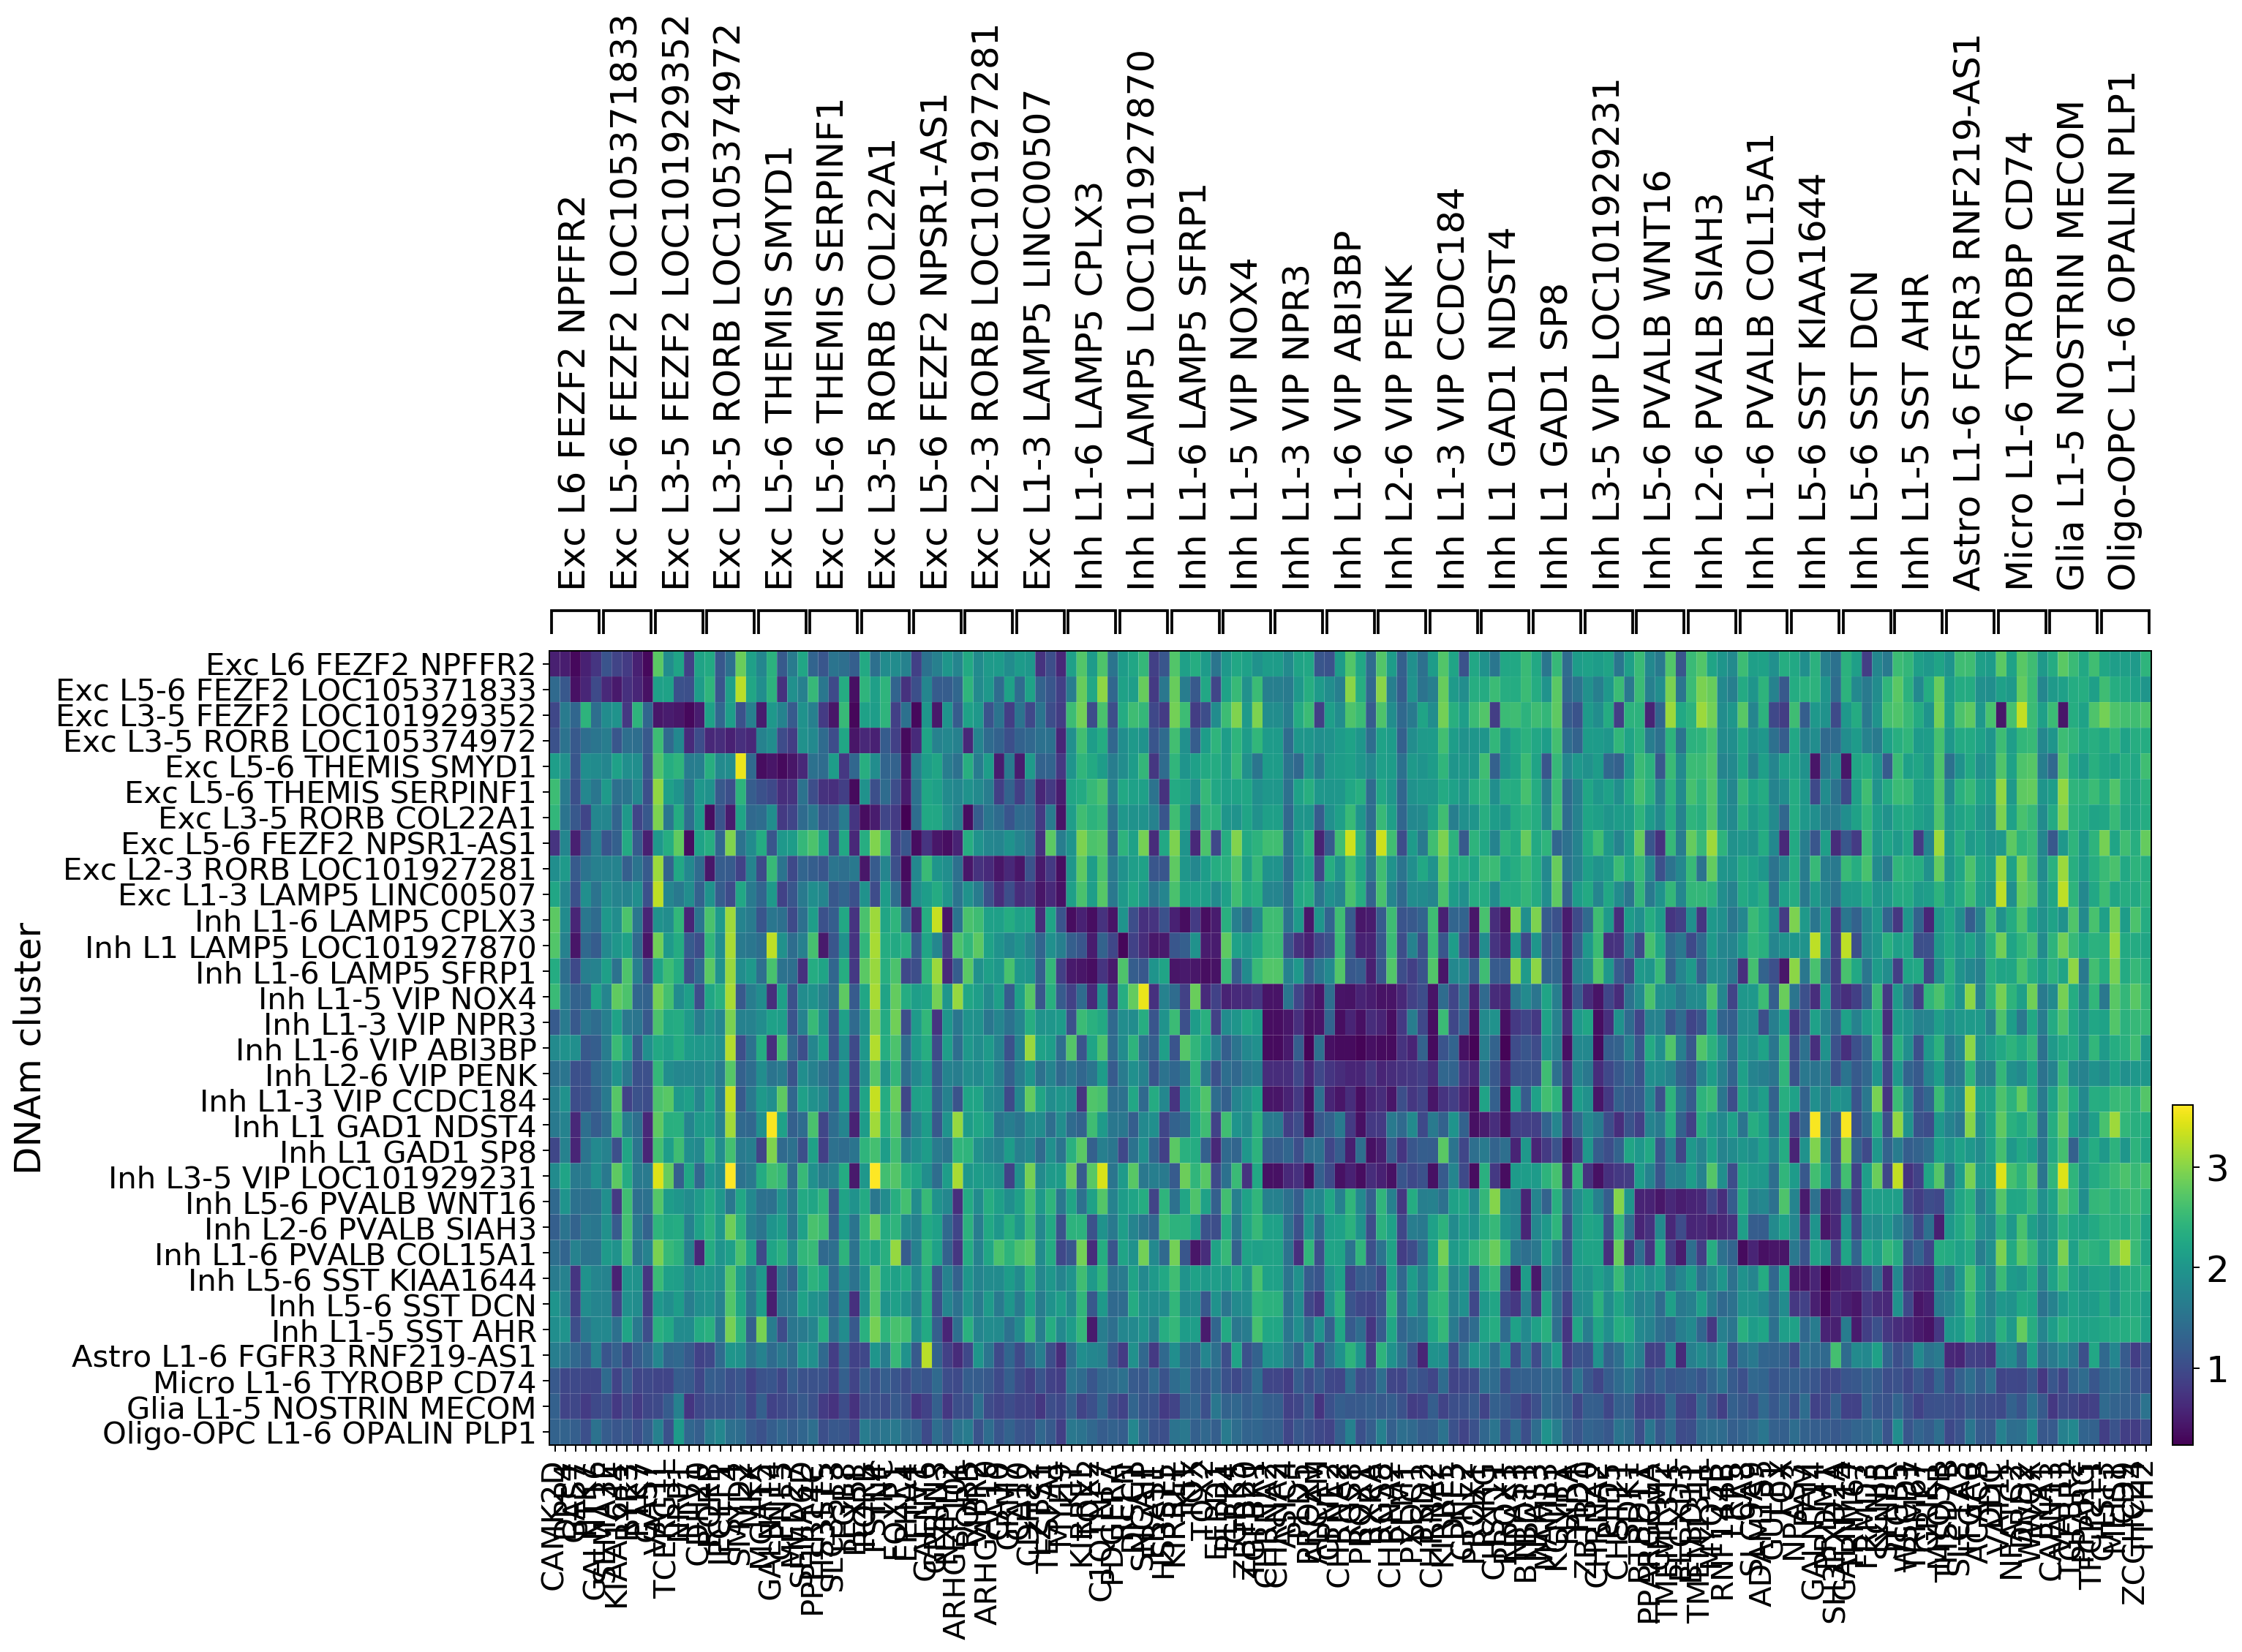

In [6]:
sc.set_figure_params(fontsize=20,dpi=90)
sc.pl.rank_genes_groups_matrixplot(adata,n_genes=5, figsize=(16,8), dendrogram=False, linewidth=0, save=f'hs.chn.marker.pdf')


In [6]:
adata = anndata.read_h5ad('PATH-TO-ANALYSIS/Human/integration-with-rna/Human.snmc.all.CGN.h5ad')
adata = adata[(adata.obs['Class']!='Outlier')&(adata.obs['SubCluster']!='Outlier')]
adata.var.index = adata.var.index.map(ens2sym.get)
adata.obs.rename(columns={'SubCluster':'DNAm cluster'},inplace=True)
adata.obs['DNAm cluster'] = adata.obs['DNAm cluster'].apply(cluster_rename.get)
rank_features_groups(adata, 'DNAm cluster')

Trying to set attribute `.obs` of view, making a copy.


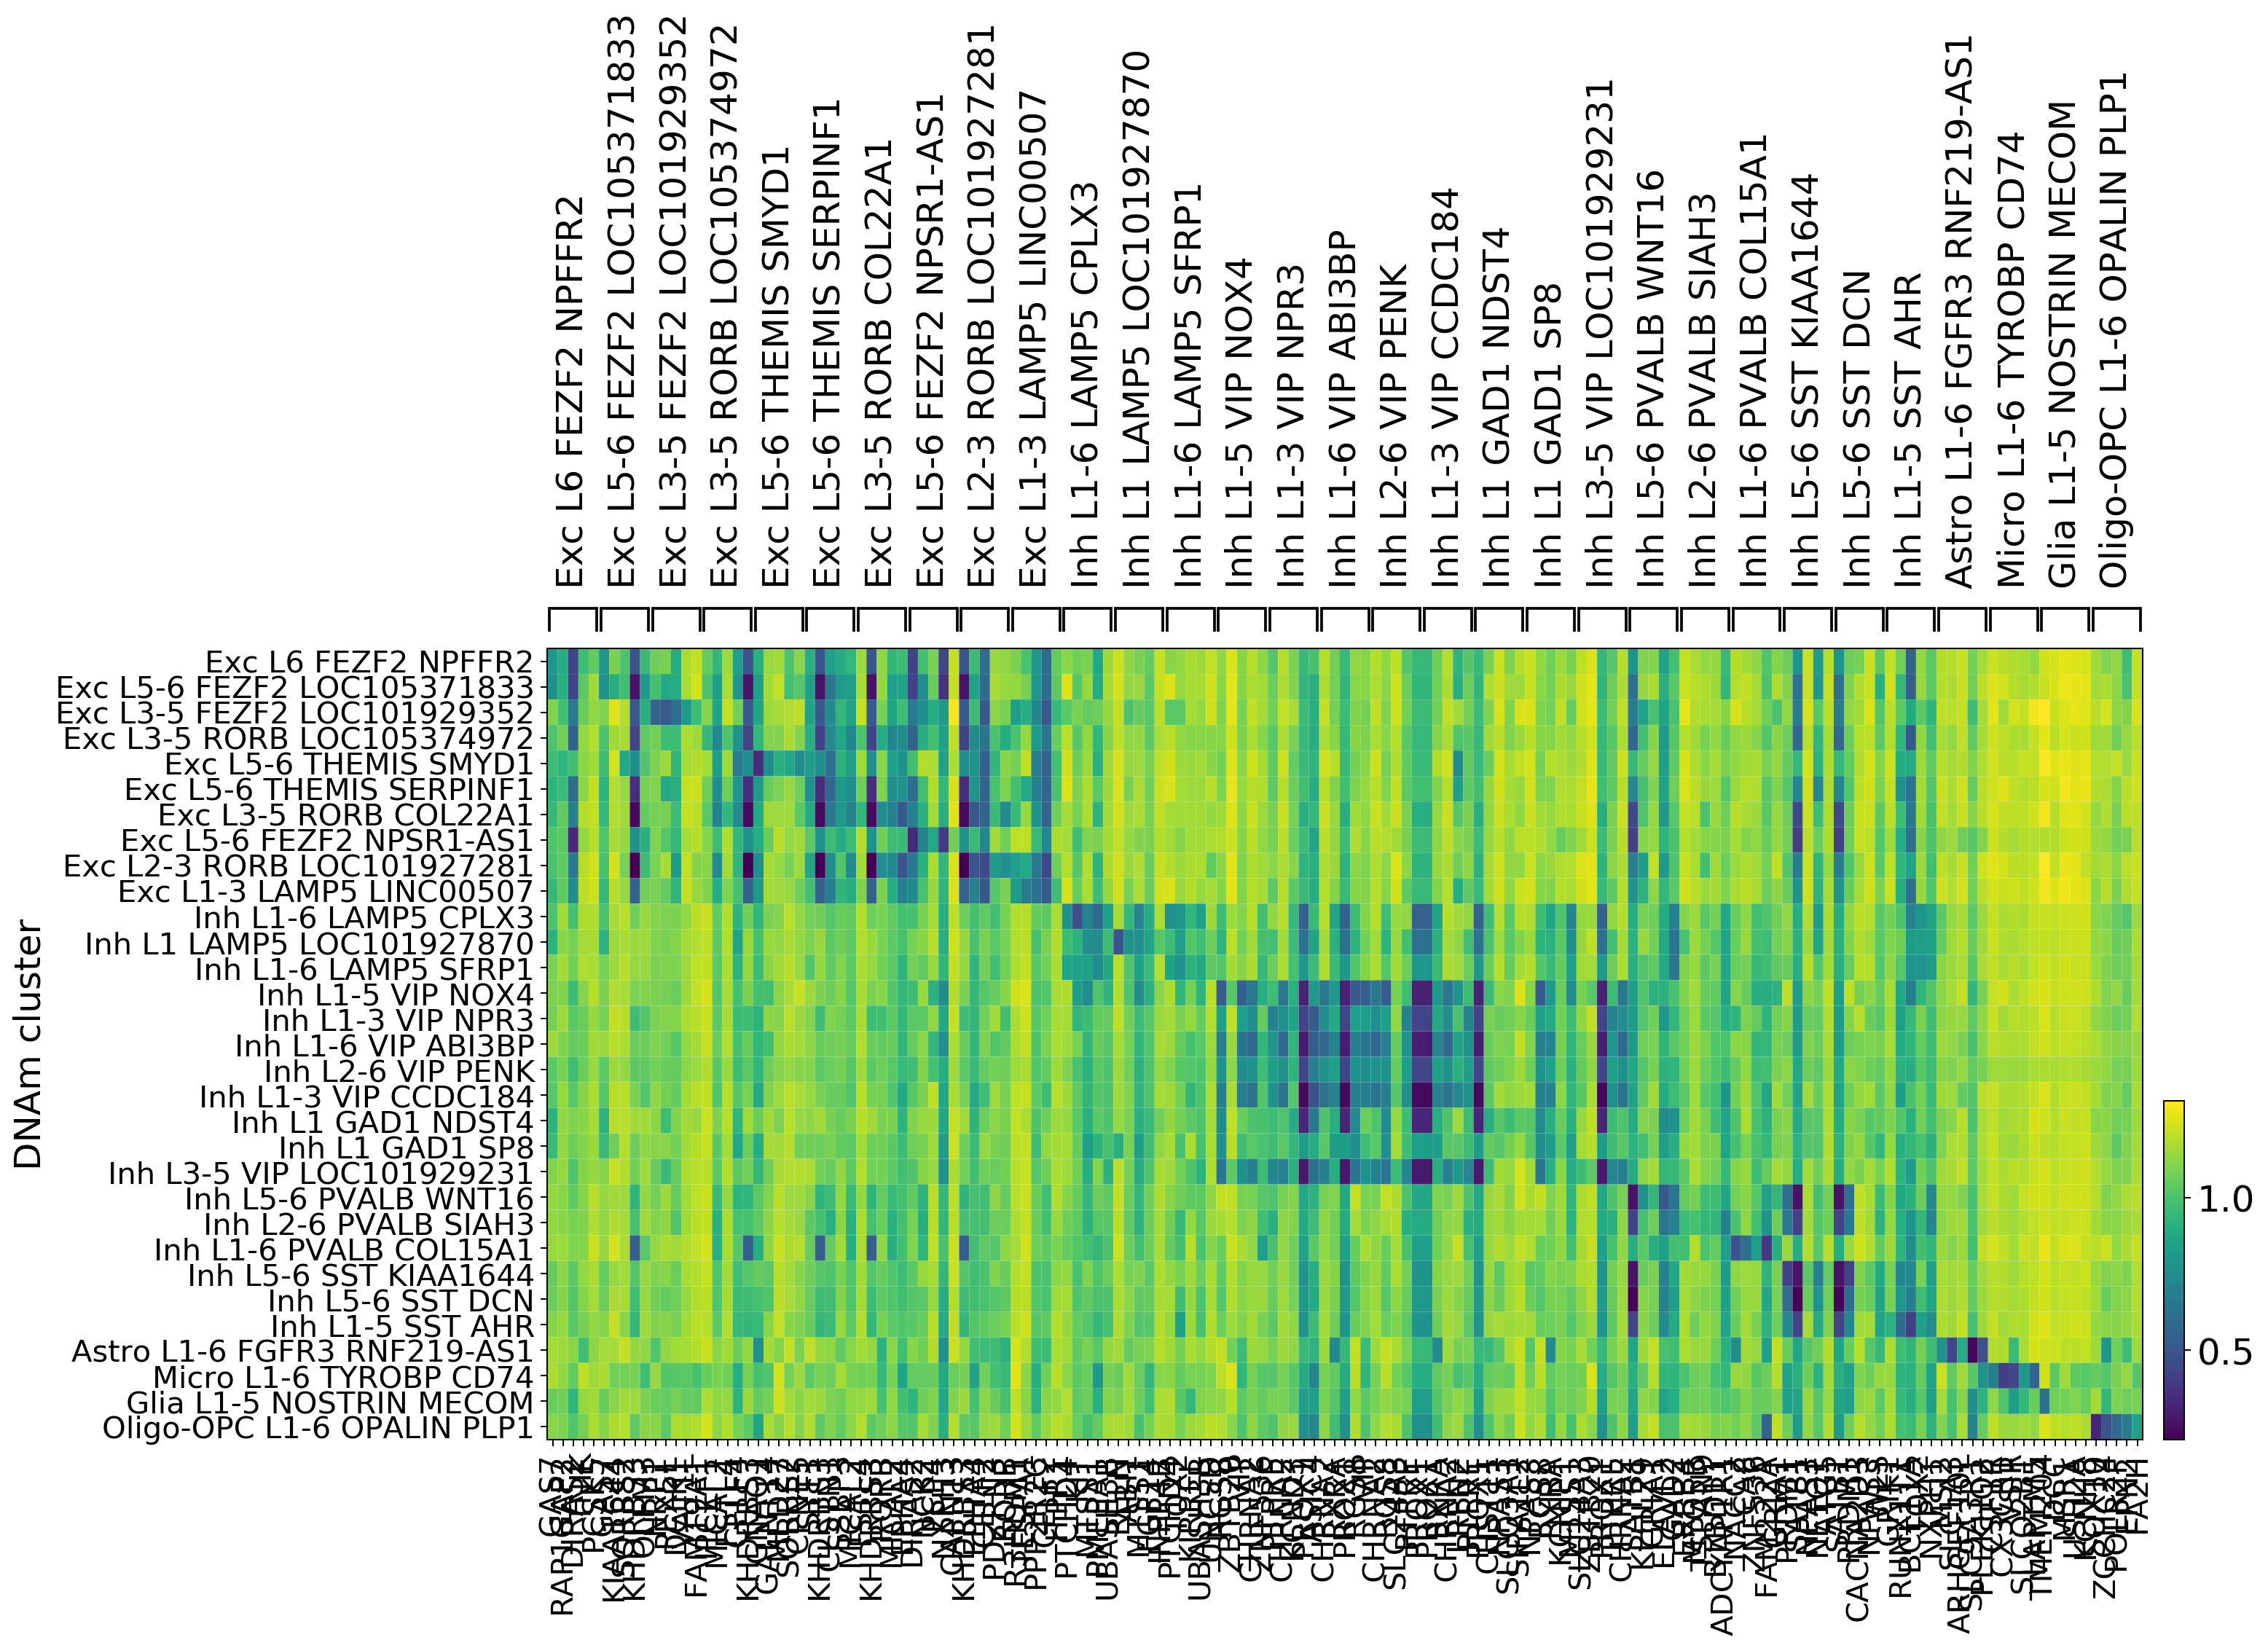

In [7]:
sc.set_figure_params(fontsize=20,dpi=90)
sc.pl.rank_genes_groups_matrixplot(adata,n_genes=5, figsize=(16,8), dendrogram=False, linewidth=0, save=f'hs.cgn.marker.pdf')
